In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


X = np.random.randint(1000, 1000000, size=(10000, 1))
y = X / 5
X = X / np.max(X)


model = keras.Sequential([
    keras.Input(shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)



Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13322584064.0000 - val_loss: 13524544512.0000
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13275076608.0000 - val_loss: 13422198784.0000
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13040289792.0000 - val_loss: 13149267968.0000
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12952511488.0000 - val_loss: 12656507904.0000
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12265328640.0000 - val_loss: 11923571712.0000
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11222185984.0000 - val_loss: 10956527616.0000
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10467409920.0000 - val_loss: 9797383168.0000
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9434162176.0000 - val_loss: 8503065088.0000
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8097637376.0000 - val_loss: 7148340224.0000
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

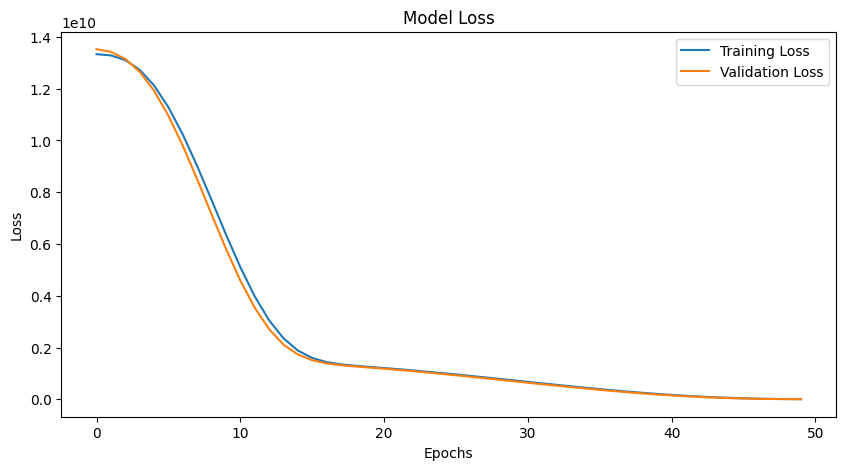

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


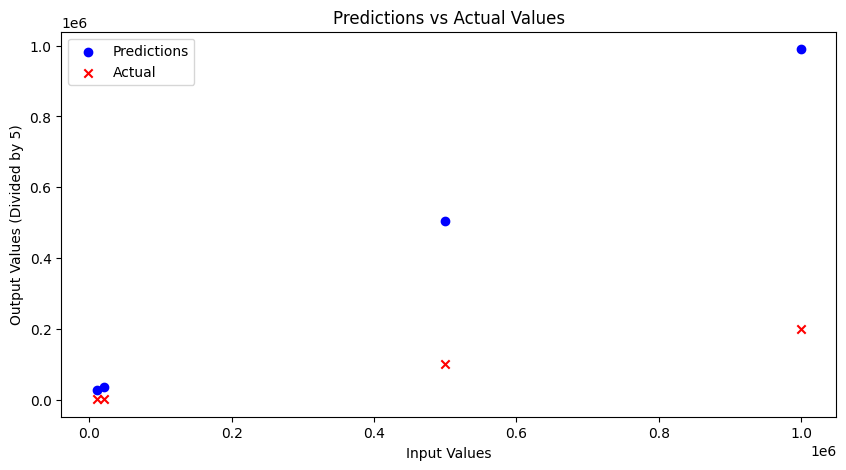

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

test_data = np.array([[10000], [20000], [500000], [999999]]).astype(float) / 1000000
predictions = model.predict(test_data)

test_data_rescaled = test_data * 1000000
predictions_rescaled = predictions * 5  # Since we divided by 5 during training

plt.figure(figsize=(10, 5))
plt.scatter(test_data_rescaled, predictions_rescaled, color='blue', label='Predictions')
plt.scatter(test_data_rescaled, test_data_rescaled / 5, color='red', label='Actual', marker='x')
plt.title('Predictions vs Actual Values')
plt.xlabel('Input Values')
plt.ylabel('Output Values (Divided by 5)')
plt.legend()
plt.show()